In [89]:
# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline 

boston = load_boston()
bos = pd.DataFrame(boston.data)

In [38]:
# Understanding the dataset
print(type(boston))
print(boston.data.shape)
print(boston.keys())
print(boston.DESCR)

<class 'sklearn.datasets.base.Bunch'>
(506, 13)
dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        -

In [39]:
bos_x = pd.DataFrame(boston.data,columns=boston.feature_names)
print(bos_x.head())
# Price is the target value here
bos_y = pd.DataFrame(boston.target)
print(bos_y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


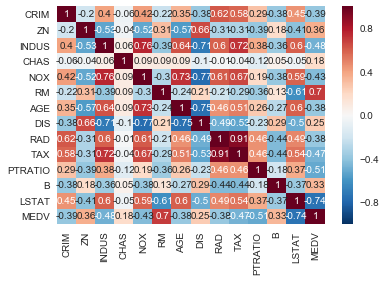

In [86]:
# Using a heat map to identify the co-relation between the two variables
boss_corr = pd.DataFrame(boston.data,columns=boston.feature_names)
# creating a new variable to include the target variable as well
boss_corr['MEDV'] = boston.target
correlation_matrix = boss_corr.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
# From the heatmap, we could infer that RAD<->TAX(Possitively correlated) AGE<->DIS(Negatively correlated) are highly correlated with each other as

In [99]:
# We drop the below columns as they are highly correlated to each other
bos_x.drop(['RAD','TAX','AGE','DIS'],axis=1)
regr = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(bos_x,bos_y,test_size=0.2,random_state=4)

Coefficients:   [[-1.14743504e-01  4.70875035e-02  8.70282354e-03  3.23818824e+00
  -1.67240567e+01  3.87662996e+00 -1.08218769e-02 -1.54144627e+00
   2.92604151e-01 -1.33989537e-02 -9.07306805e-01  8.91271054e-03
  -4.58747039e-01]]
Intercept:  [35.60325757]
MSE:  21.20322349930998
The root mean squared value(RMSE) is :  4.604695809639328
The variance score is :  0.7414502395070284


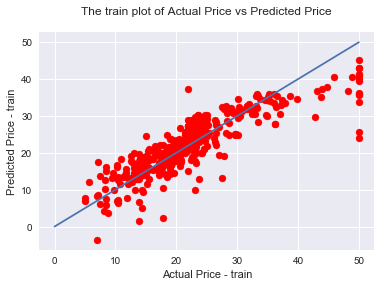

In [103]:
# Building a linear regression model on train dataset
train = regr.fit(x_train,y_train)
print("Coefficients:  ",regr.coef_)
print("Intercept: ",regr.intercept_)
train_pred = regr.predict(x_train)
# Calculating the mean squared value
mse = mean_squared_error(y_train, train_pred)
print("MSE: ",mse)
print("The root mean squared value(RMSE) is : ",np.sqrt(mse))
# Calculating the variance score
print("The variance score is : ",regr.score(x_train,y_train))
# Obataining 74 percentage on the train dataset
plt.scatter(y_train,train_pred,color="red")
plt.plot([0, 50], [0, 50], '-')
plt.xlabel("Actual Price - train")
plt.ylabel("Predicted Price - train")
plt.title("The train plot of Actual Price vs Predicted Price\n")
plt.show()

Coefficients:   [[-7.88999464e-02  4.40387143e-02  1.01246593e-01  1.59586216e+00
  -2.21483437e+01  3.39761682e+00  4.65548213e-02 -1.16774905e+00
   3.95253128e-01 -1.15586623e-02 -1.12572311e+00  1.21916201e-02
  -7.83137748e-01]]
Intercept:  [40.71750843]
MSE:  21.97070660180354
The root mean squared value is :  4.687292032912344
The variance score is :  0.7634741084483261


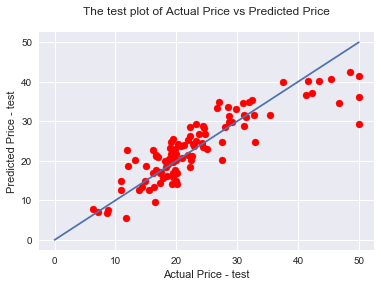

In [102]:
# Building a linear regression model on test dataset
test = regr.fit(x_test,y_test)
print("Coefficients:  ",regr.coef_)
print("Intercept: ",regr.intercept_)
test_pred = regr.predict(x_test)
# Calculating the mean squared value
mse = mean_squared_error(y_test, test_pred)
print("MSE: ",mse)
print("The root mean squared value(RMSE) is : ",np.sqrt(mse))
# Calculating the variance score
print("The variance score is : ",regr.score(x_test,y_test))
# Obataining 76 percentage on the test dataset
plt.scatter(y_test,test_pred,color="red")
plt.plot([0, 50], [0, 50], '-')
plt.xlabel("Actual Price - test")
plt.ylabel("Predicted Price - test")
plt.title("The test plot of Actual Price vs Predicted Price\n")
plt.show()